In [28]:
import yfinance as yf
import datetime as dt
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import mplfinance as mpf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance, plot_tree
from statsmodels.tsa.seasonal import seasonal_decompose

# Data

In [34]:
today = dt.datetime.today().strftime('%Y-%m-%d')
start_date = '2021-01-01'
df = yf.download('ETH-USD', start_date, today)

[*********************100%%**********************]  1 of 1 completed


In [35]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358
2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179
2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368
2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763
2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781
...,...,...,...,...,...,...
2024-04-28,3252.245605,3351.176514,3249.149170,3262.774658,3262.774658,11379192678
2024-04-29,3262.340820,3285.468750,3116.199951,3215.428955,3215.428955,15032246816
2024-04-30,3215.381104,3249.378418,2918.228760,3012.286865,3012.286865,18266894653


# Plots

## OHLC

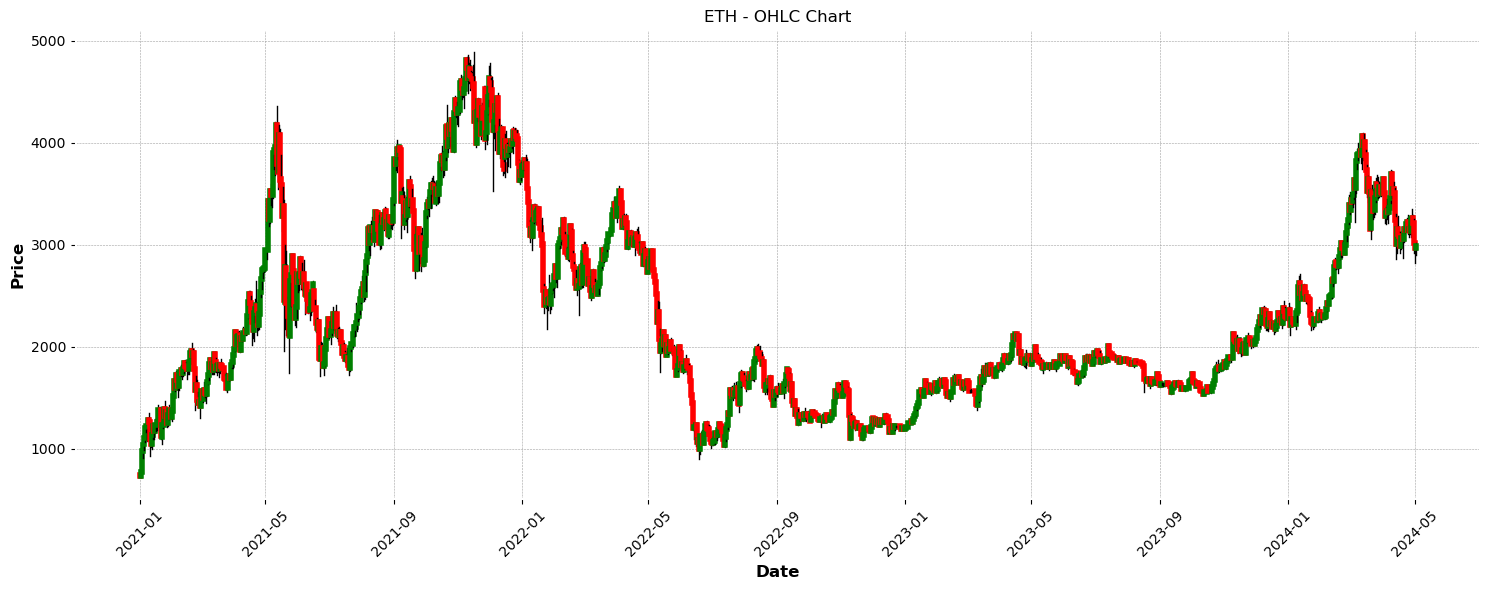

In [36]:
plt.figure(figsize=(15, 6))

for date in df.index:
    open_price = df.loc[date, 'Open']
    high_price = df.loc[date, 'High']
    low_price = df.loc[date, 'Low']
    close_price = df.loc[date, 'Close']

    if close_price >= open_price:
        color = 'green'
    else:
        color = 'red'

    plt.plot([date, date], [low_price, high_price], color='black', linewidth=1)  # High and low
    plt.plot([date, date], [open_price, close_price], color=color, linewidth=4)  # Open and close

plt.title('ETH - OHLC Chart')
plt.xlabel('Date')
plt.ylabel('Price')

plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

## Volume

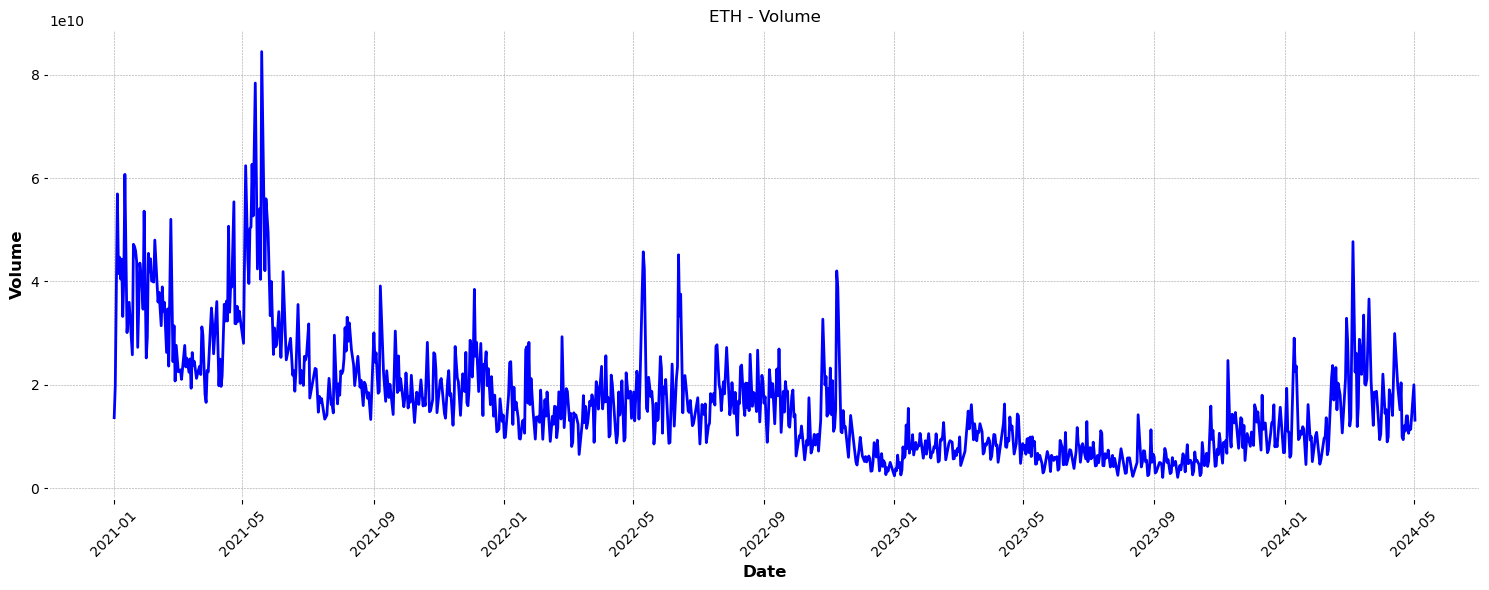

In [37]:
plt.figure(figsize=(15, 6))

plt.plot(df.index, df['Volume'], color='blue')

plt.title('ETH - Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Decomposition

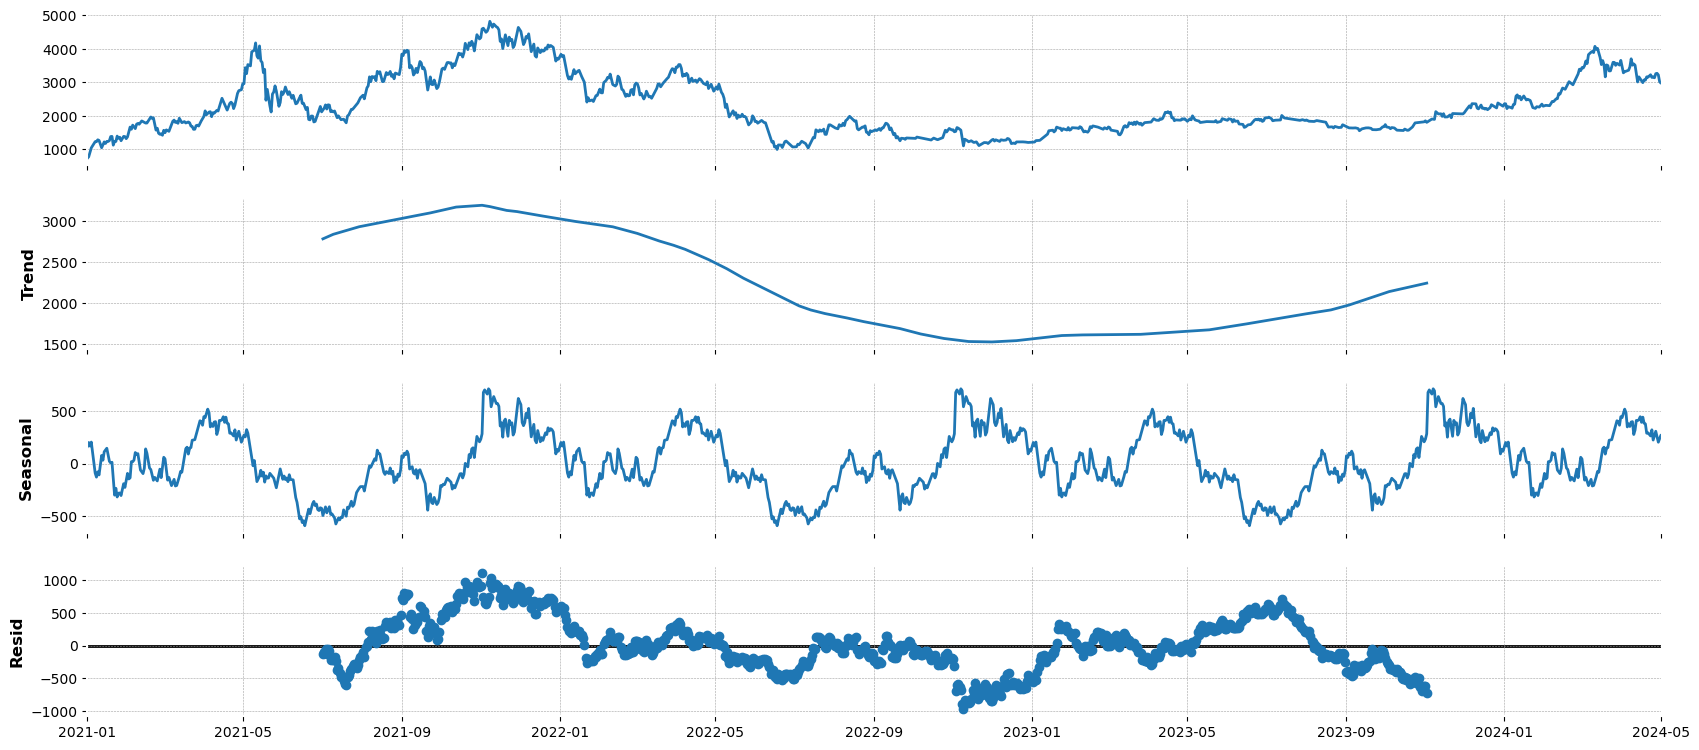

In [38]:
df_close = df[['Close']]
df_close.head()

decomp = seasonal_decompose(df_close, period=365)
fig = decomp.plot()
fig.set_size_inches(20, 8)

# Technical Indicators
